In [1]:
%reload_ext autoreload
%autoreload 2

In [64]:
from chexnet import ChexNet
from unet import Unet
from PIL import Image
import matplotlib.pyplot as plt
from heatmap import HeatmapGenerator
import numpy as np
import cv2

In [48]:
unet = Unet()
chexnet = ChexNet()
unet.eval()
chexnet.eval();
heatmap_generator = HeatmapGenerator(chexnet)

In [69]:
image = Image.open('/Users/dattran/Downloads/bme-xray/IMG_3152.JPG')
w, h = image.size

In [70]:
(t, l, b, r), mask = unet.segment(image)
cropped_image = image.crop((l, t, r, b))
prob = chexnet.predict(cropped_image)

c_w, c_h = cropped_image.size
heatmap, _ = heatmap_generator.from_prob(prob, c_w, c_h)
p_l, p_t = l, t
p_r, p_b = w-r, h-b
heatmap = np.pad(heatmap, ((p_t, p_b), (p_l, p_r)), mode='linear_ramp', end_values=0)
heatmap = ((heatmap - heatmap.min()) * (1 / (heatmap.max() - heatmap.min())) * 255).astype(np.uint8)
cam = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) * 0.4 + np.array(image)

In [73]:
t = (cam / cam.max()) * 255

In [76]:
cv2.imwrite('temp.jpg',cam)

True

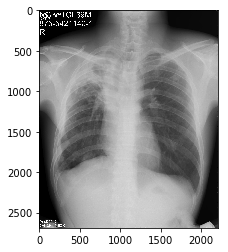

In [61]:
plt.imshow(image)